In [260]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [261]:
#Loading the dataset
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

#Creating a dataframe and assigning it to a variable
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['species'])

In [262]:
#Preprocessing the dataset
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  


In [263]:
print("\nSummary Statistics:")
print(iris_df.describe())


Summary Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [264]:
print("\nSpecies Counts:")
print(iris_df['species'].value_counts())


Species Counts:
species
0.0    50
1.0    50
2.0    50
Name: count, dtype: int64


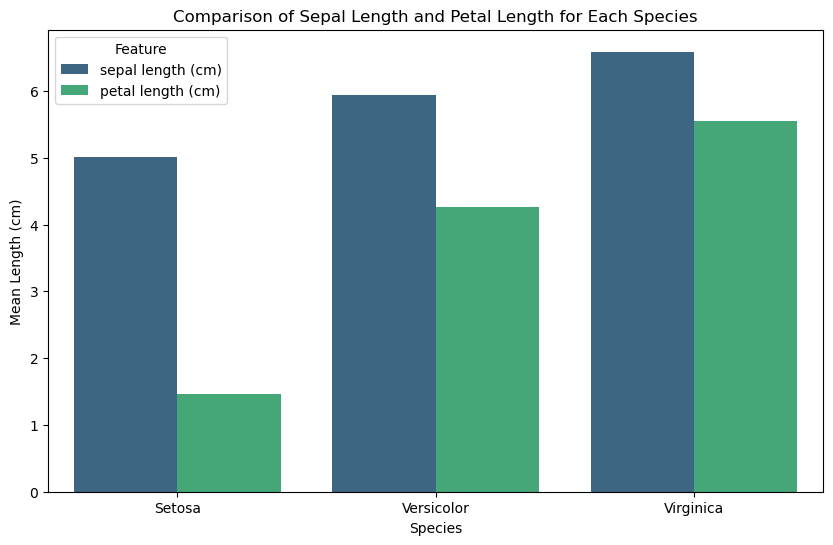

In [265]:
# Calculate the mean sepal length and petal length for each species
mean_lengths = iris_df.groupby('species')[['sepal length (cm)', 'petal length (cm)']].mean().reset_index()
mean_lengths_melted = pd.melt(mean_lengths, id_vars='species', var_name='Feature', value_name='Mean Length')

plt.figure(figsize=(10, 6))
sns.barplot(x='species', y='Mean Length', hue='Feature', data=mean_lengths_melted, palette='viridis')
plt.title('Comparison of Sepal Length and Petal Length for Each Species')
plt.xlabel('Species')
plt.ylabel('Mean Length (cm)')
plt.xticks(ticks=[0, 1, 2], labels=['Setosa', 'Versicolor', 'Virginica'])
plt.legend(title='Feature')
plt.show()

/Users/gagan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


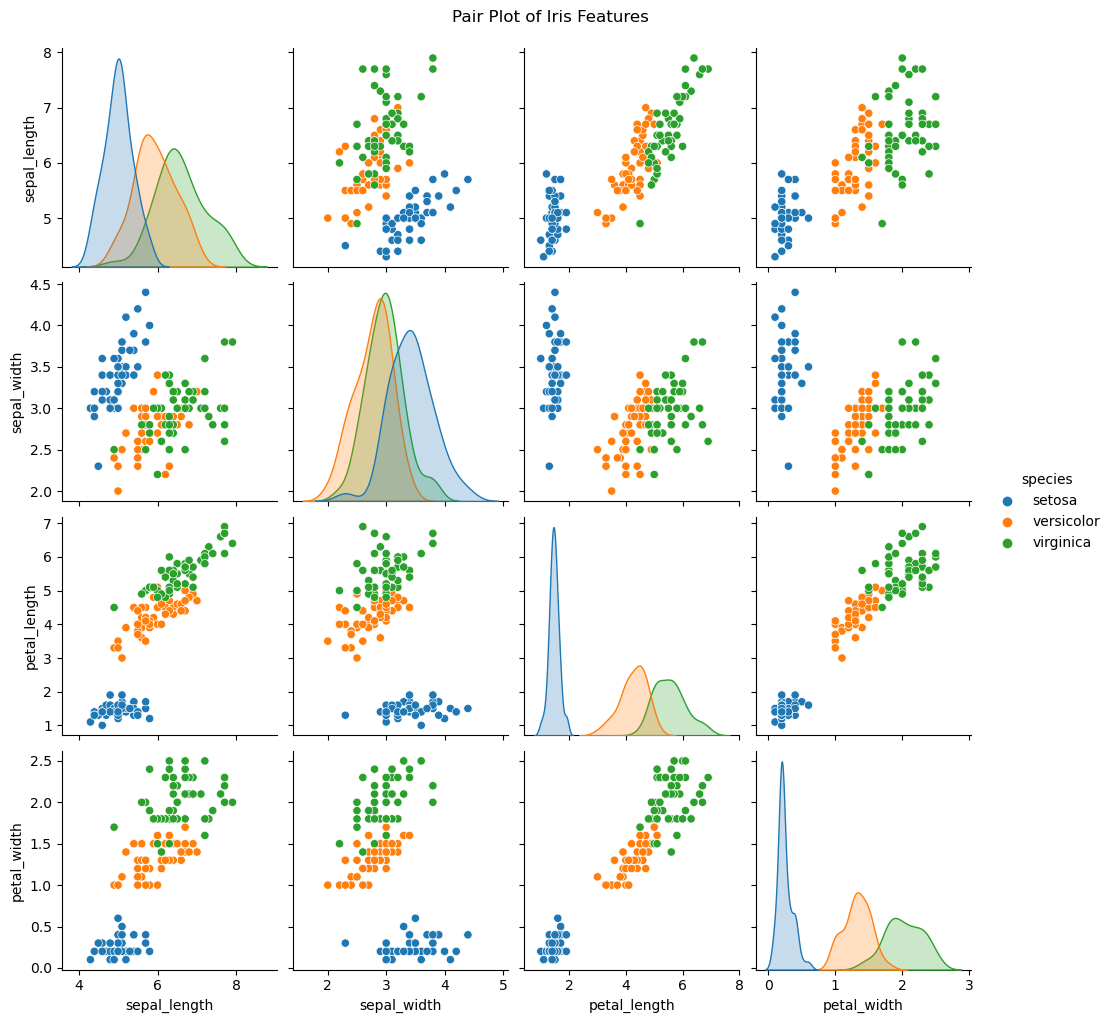

In [266]:
import seaborn as sns
import matplotlib.pyplot as plt

iris = sns.load_dataset("iris")

#pairplotting of iris features
sns.pairplot(iris, hue="species", diag_kind="kde")
plt.suptitle("Pair Plot of Iris Features", y=1.02)
plt.show()

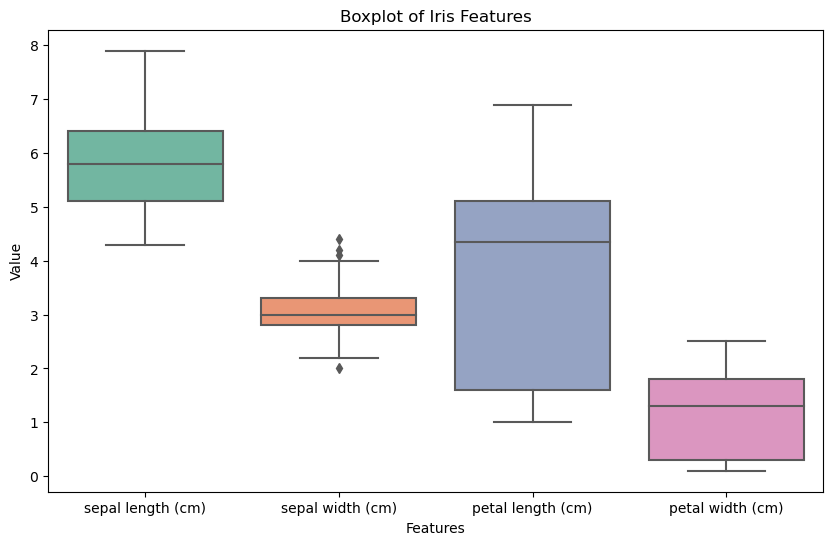

In [267]:
#boxplotting of iris features
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris_df.drop('species', axis=1), palette='Set2')
plt.title('Boxplot of Iris Features')
plt.xlabel('Features')
plt.ylabel('Value')
plt.show()

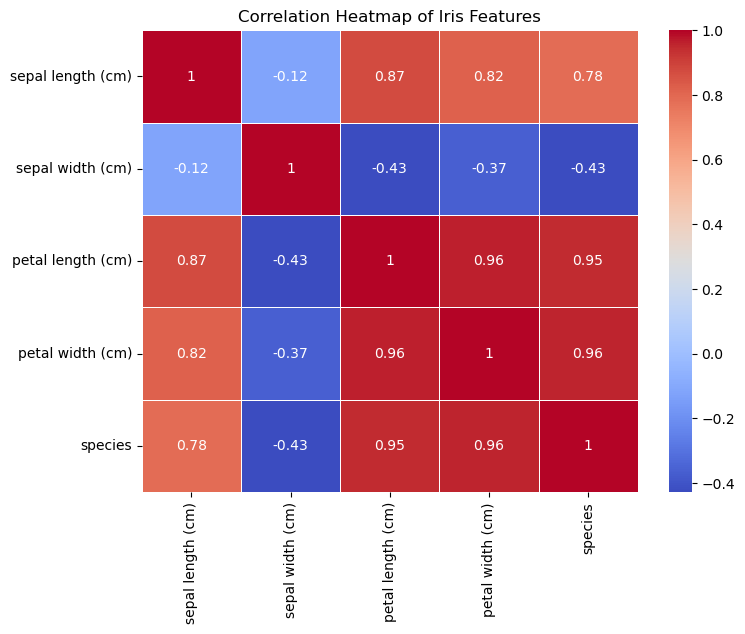

In [268]:
#heatmap plotting of iris dataset
plt.figure(figsize=(8, 6))
sns.heatmap(iris_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Iris Features')
plt.show()

In [269]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

In [270]:
#Initialize SVM classifiers
svm_linear = SVC(kernel='linear', C=1.0)
svm_poly = SVC(kernel='poly', degree=3)
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')

In [271]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

#Function to evaluate SVM model using KFold cross-validation
def evaluate_model(model, X, y, kfold):
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    
    #Fitting and evaluating the model
    
    for train_index, test_index in kfold.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
        recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
    
    return {
        'accuracy': np.mean(accuracy_scores),
        'precision': np.mean(precision_scores),
        'recall': np.mean(recall_scores),
        'f1_score': np.mean(f1_scores)
    }

In [272]:
evaluation_linear = evaluate_model(svm_linear, X_scaled, y, kfold)
evaluation_poly = evaluate_model(svm_poly, X_scaled, y, kfold)
evaluation_rbf = evaluate_model(svm_rbf, X_scaled, y, kfold)

# Print evaluation metrics
print("Linear SVM:")
print("Accuracy:", evaluation_linear['accuracy'])
print("Precision:", evaluation_linear['precision'])
print("Recall:", evaluation_linear['recall'])
print("F1 Score:", evaluation_linear['f1_score'])
print()

print("Polynomial SVM:")
print("Accuracy:", evaluation_poly['accuracy'])
print("Precision:", evaluation_poly['precision'])
print("Recall:", evaluation_poly['recall'])
print("F1 Score:", evaluation_poly['f1_score'])
print()

print("RBF SVM:")
print("Accuracy:", evaluation_rbf['accuracy'])
print("Precision:", evaluation_rbf['precision'])
print("Recall:", evaluation_rbf['recall'])
print("F1 Score:", evaluation_rbf['f1_score'])

Linear SVM:
Accuracy: 0.9733333333333334
Precision: 0.9757485107485108
Recall: 0.9733333333333334
F1 Score: 0.973163036912236

Polynomial SVM:
Accuracy: 0.9266666666666667
Precision: 0.9414558774558776
Recall: 0.9266666666666667
F1 Score: 0.9252295554940864

RBF SVM:
Accuracy: 0.9666666666666668
Precision: 0.9685690235690234
Recall: 0.9666666666666668
F1 Score: 0.9665896264038679


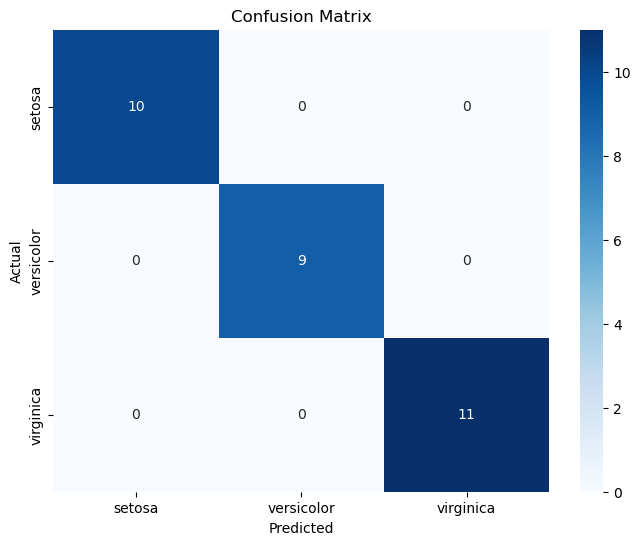

In [273]:
from sklearn.metrics import confusion_matrix

#Computing the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

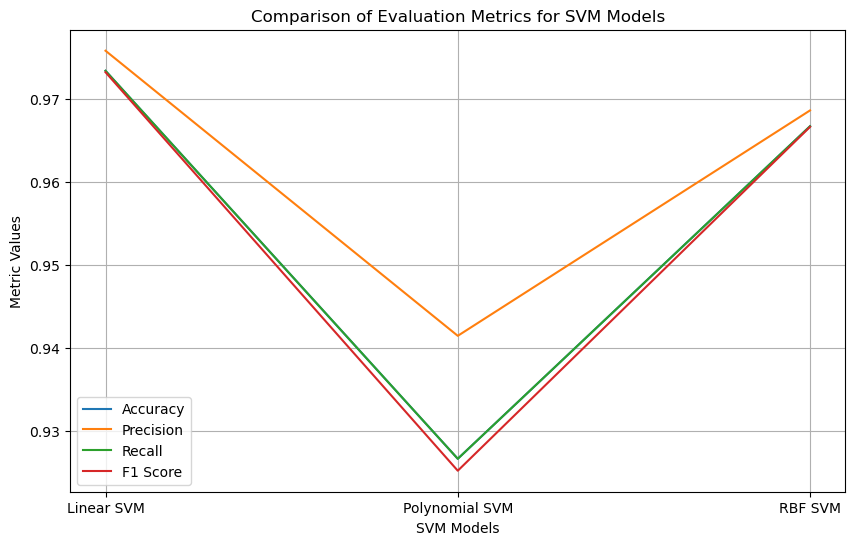

In [274]:
#using lineplot to compare the evaluation metrics for SVM configurations
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

linear_values = [evaluation_linear['accuracy'], evaluation_linear['precision'], evaluation_linear['recall'], evaluation_linear['f1_score']]
poly_values = [evaluation_poly['accuracy'], evaluation_poly['precision'], evaluation_poly['recall'], evaluation_poly['f1_score']]
rbf_values = [evaluation_rbf['accuracy'], evaluation_rbf['precision'], evaluation_rbf['recall'], evaluation_rbf['f1_score']]

plt.figure(figsize=(10, 6))
for i, metric in enumerate(metrics):
        plt.plot([1, 2, 3], [linear_values[i], poly_values[i], rbf_values[i]], label=metric)

plt.xlabel('SVM Models')
plt.ylabel('Metric Values')
plt.title('Comparison of Evaluation Metrics for SVM Models')
plt.xticks([1, 2, 3], ['Linear SVM', 'Polynomial SVM', 'RBF SVM'])
plt.legend()
plt.grid(True)
plt.show()